# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The dataset can be found [here](https://github.com/fahimalamabir/datatuneanalytics/blob/main/drug_safety.csv).

### Project Task:
Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, saving the p-value as a variable called `two_sample_p_value`.

Find out if the number of adverse effects is independent of the treatment and control groups, saving as a variable called `num_effects_p_value` containing a p-value.

Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called `age_group_effects_p_value`.

-  Two-sample proportion test to determine if there is a significant difference in the proportion of adverse effects between the Drug and Placebo groups.

- chi-squared test of independence to find out if the number of adverse effects is independent of the treatment and control groups.

- t-test to examine if there is a significant difference in the ages between the Drug and Placebo groups.

In [17]:
from scipy.stats import ttest_ind, chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

# Filter the data for Drug and Placebo groups
drug_group = drug_safety[drug_safety['trx'] == 'Drug']
placebo_group = drug_safety[drug_safety['trx'] == 'Placebo']

# Two-sample proportion test
# We need to count the number of adverse effects and the total number of cases for each group
count_drug = drug_group['adverse_effects'].value_counts()['Yes']
nobs_drug = drug_group['adverse_effects'].count()

count_placebo = placebo_group['adverse_effects'].value_counts()['Yes']
nobs_placebo = placebo_group['adverse_effects'].count()

# Conducting the z-test for two proportions
two_sample_stat, two_sample_p_value = proportions_ztest([count_drug, count_placebo], [nobs_drug, nobs_placebo])

# Preparing data for chi-squared test of independence
# Creating a contingency table for the number of adverse effects and treatment groups
contingency_table = pd.crosstab(drug_safety['trx'], drug_safety['num_effects'])

# Chi-squared test of independence
chi2_stat, num_effects_p_value, dof, ex = chi2_contingency(contingency_table, correction=False)

# T-test to examine if there is a significant difference in the ages between the Drug and Placebo groups
age_group_stat, age_group_effects_p_value = ttest_ind(drug_group['age'], placebo_group['age'])

# Printing out the p-values for the tests
two_sample_p_value, num_effects_p_value, age_group_effects_p_value

(0.9639333330262475, 0.6150123339426765, 0.1378311579270559)

The resulting p-values, here are the interpretations:

- Two-sample Proportion Test (p-value = 0.964):
This test aimed to compare the proportion of individuals experiencing adverse effects between the Drug and Placebo groups. A p-value of 0.964 indicates there is no statistically significant difference in the proportion of adverse effects between the two groups. That means, from the data, adverse effects are equally common (or rare) in both the Drug and the Placebo groups under the conditions of the study.

- Chi-squared Test of Independence (p-value = 0.615):
The chi-squared test was used to determine if the number of adverse effects is independent of the treatment groups. With a p-value of 0.615, we fail to reject the null hypothesis of independence. This suggests that the number of adverse effects a participant experiences is not dependent on whether they were in the Drug or Placebo group.

- T-test for Age Differences (p-value = 0.138):
This test was conducted to see if there is a significant age difference between participants in the Drug and Placebo groups. The p-value of 0.138 indicates that there is no significant age difference between the groups. In other words, age is not a differing factor between the groups, suggesting that any effects observed are not due to age discrepancies.


All the p-values are above the common significance level (α = 0.05), meaning there are no significant differences or associations based on the tests conducted for this data. This could imply that the drug does not have a differential impact on the adverse effects experienced by the participants in comparison to the placebo, and these effects are not influenced by the age of the participants.

C:\Users\aBr\anaconda3\envs\streamlit\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\aBr\anaconda3\envs\streamlit\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\aBr\anaconda3\envs\streamlit\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\aBr\anaconda3\envs\streamlit\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


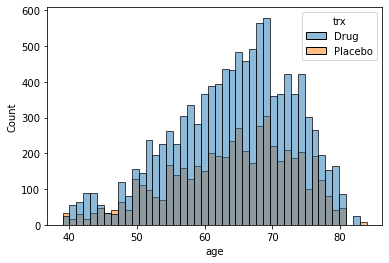

In [13]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Count the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

# Compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()

# Create an array of the "Yes" counts for each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]

# Create an array of the total number of rows in each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

# Perform a two-sided z-test on the two proportions
two_sample_results = proportions_ztest(yeses, n)

# Store the p-value
two_sample_p_value = two_sample_results[1]

# Determine if num_effects and trx are independent
num_effects_groups = pingouin.chi2_independence(
    data=drug_safety, x="num_effects", y="trx")

# Extract the p-value
num_effects_p_value = num_effects_groups[2]["pval"][0]

# Create a histogram with Seaborn
sns.histplot(data=drug_safety, x="age", hue="trx")

# Optionally - confirm the histogram's output by conducting a normality test
# To choose between unpaired t-test and Wilcoxon-Mann-Whitney test
normality = pingouin.normality(
    data=drug_safety,
    dv='age',
    group='trx',
    method='shapiro', # the default
    alpha=0.05) # 0.05 is also the default

# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Since the data distribution is not normal
# Conduct a two-sided Mann-Whitney U test
age_group_effects = pingouin.mwu(age_trx, age_placebo)

# Extract the p-value
age_group_effects_p_value = age_group_effects["p-val"]

Here's a breakdown of what we can infer:

- Axes: The x-axis represents the age of individuals, and the y-axis shows the count of individuals. Each bar's height indicates how many individuals fall within a particular age range.

- Groups: There are two groups represented in different colors:The blue bars represent individuals who were given the drug treatment. The orange bars represent individuals who were given a placebo.

- Distribution: Both distributions seem roughly bell-shaped, which suggests a normal distribution for age in both the drug and placebo groups. This is a common pattern in biological data.

- Overlap: There’s a significant overlap between the two groups, which could imply that the age distributions for both treatment and placebo groups are similar.

- Counts: Since the ratio of drug observations to placebo observations is 2 to 1, we would expect, on average, the counts (heights of bars) for the drug group to be about twice as high as those for the placebo. This seems to be roughly the case, although without numerical labels or a legend that matches the bars to the treatment types, it's an assumption based on your description.

- Legends: The legend in the upper right corner indicates the variable 'trx' with two categories, 'Drug' and 'Placebo'. However, the color coding in the legend doesn’t seem to match the plot, as there is only blue and no visible orange. This could be a graphical error or an issue with how the colors are represented.

- Age Range: The majority of participants are between approximately 50 and 70 years old, with the largest number of participants around 60 years old, as indicated by the tallest bars.

- Potential Insights: If this plot were part of a statistical analysis, one might be looking to compare the ages of participants in the drug vs. placebo groups to ensure they are similar. This is important for ensuring that age doesn't confound the results of the drug efficacy.
